In [152]:
import numpy as np
import matplotlib.pyplot as plt

x = [i for i in range (1,51)]
y = [i + np.random.uniform(-1,1) for i in x]

Optimal Weights obtained using Pseudo Inverse: [0.0323818  1.00085945]


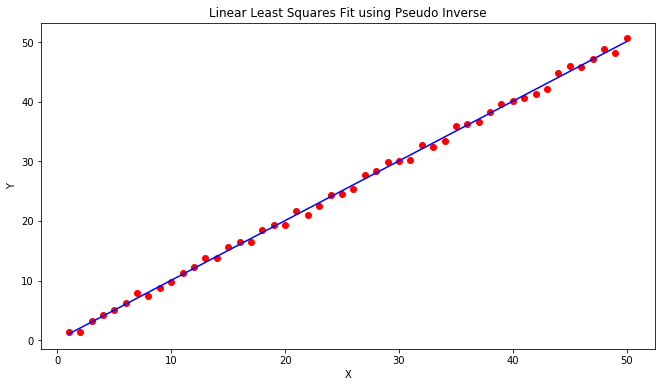

In [153]:
pseudo_inverse_x = np.linalg.pinv(np.array([np.ones(50), x]))
weights =  np.dot(y, pseudo_inverse_x)
print("Optimal Weights obtained using Pseudo Inverse:", weights)

plt.figure(figsize=(11,6))
plt.scatter(x, y, c = 'red')
plt.plot(x, [weights[0] + weights[1]*i for i in x], c = 'blue')
plt.ylabel('Y')
plt.xlabel('X')
plt.title('Linear Least Squares Fit using Pseudo Inverse')
plt.show()

In [154]:
weights = np.array([0,0])
energies = []
weights0 = []
weights1 = []

func = lambda w0, w1 : sum([(y[i] - (w0 + w1 * x[i])) ** 2 for i in range(len(x))])

df_dw0 = lambda w0, w1 : -2 * sum([y[i] - (w0 + w1 * x[i]) for i in range(len(x))])

df_dw1 = lambda w0, w1 : -2 * sum([x[i] * (y[i] - (w0 + w1 * x[i])) for i in range(len(x))])

energies.append(func(weights[0], weights[1]))
weights0.append(weights[0])
weights1.append(weights[1])
learning_rate = 0.0000001
epoch = 0

while(True):
    gradient = np.array([df_dw0(w[0],w[1]), df_dw1(w[0],w[1])])
    weights = weights - (learning_rate * gradient)
    try:
        energy = func(weights[0],weights[1])
    except ValueError:
        print("The points fall out of the domain and the global minima is not yet reached. Please try with different initial weights or learning rate")
        break
    epoch+=1
    
    if energy >= energies[-1] or epoch == 1000 :
        break
    else:
        energies.append(energy)
        weights0.append(weights[0])
        weights1.append(weights[1])
        
print(f"Initial Energy: {energies[0]}")
print(f"Final Energy: {energies[-1]}")
print(f"Number of epochs: {epoch}")
print(f"Final Weights {weights}")

Initial Energy: 43098.06645388632
Final Energy: 17.012260299996978
Number of epochs: 117
Final Weights [0.02989853 1.00627438]


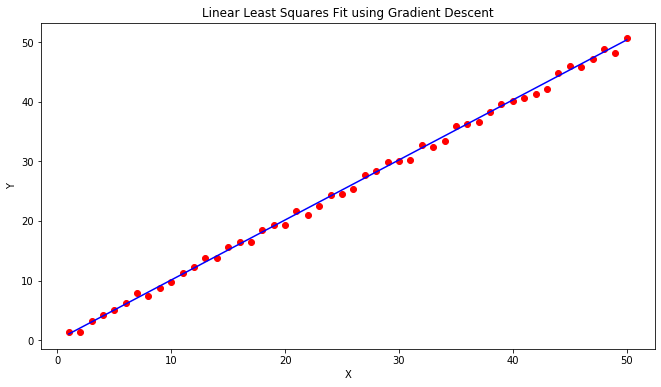

In [155]:
plt.figure(figsize=(11,6))
plt.scatter(x, y, c = 'red')
plt.plot(x, [weights[0] + weights[1]*i for i in x], c = 'blue')
plt.ylabel('Y')
plt.xlabel('X')
plt.title('Linear Least Squares Fit using Gradient Descent')
plt.show()

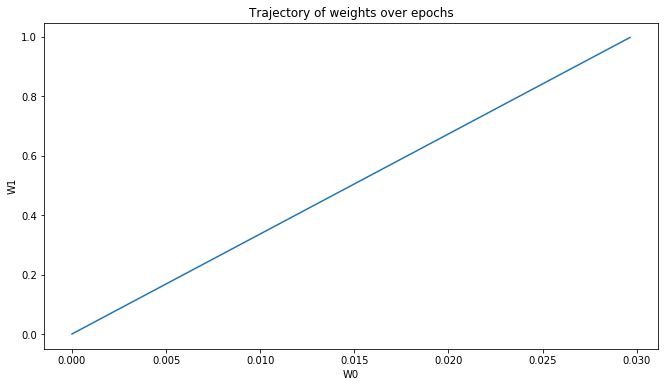

In [156]:
plt.figure(figsize=(11,6))
plt.xlabel("W0")
plt.ylabel("W1")
plt.plot(weights0, weights1)
plt.title("Trajectory of weights over epochs")
plt.show()

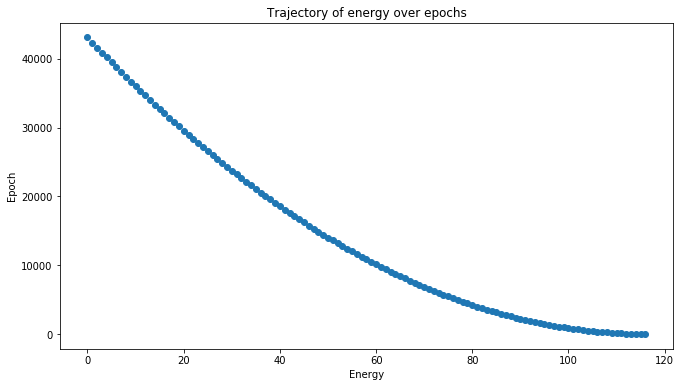

In [157]:
plt.figure(figsize=(11,6))
plt.scatter(range(len(energies)), energies)
plt.ylabel("Epoch")
plt.xlabel("Energy")
plt.title("Trajectory of energy over epochs")
plt.show()

### Comparing the final weights we have from weights Pseudo Inverse as [0.0323818  1.00085945] whereas the weights obtained from the gradient descent method is [0.02989853 1.00627438].